# Geometry display and flying of sirrated ESA
This example goes over some of the baseline functionality in simPyon, namely refining geometries, fast adjusting pas and outputting and plotting data.

Start with the basic imports

In [1]:
import simPyon as sim
import matplotlib
%matplotlib notebook

Load simion command environment

In [2]:
esa = sim.simion()

Show a cross section of the electrode geometry and overlay measurement ruler to check dimensions

You can also display the electrode names by setting ``annotate = True``

<IPython.core.display.Javascript object>


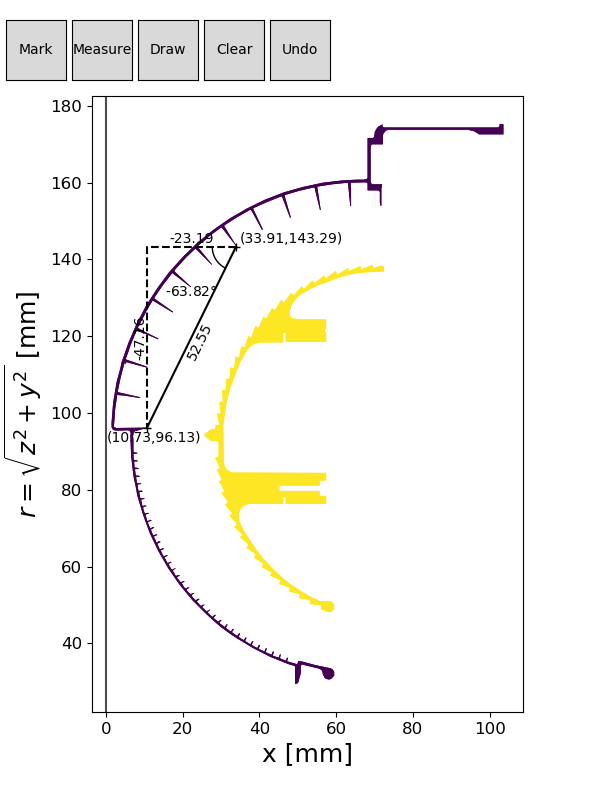

Fig Measure connected:
Double Click outside Plot to Disconnect


In [7]:
fig,ax = esa.show(measure = True)
fig.set_size_inches(6,8)

convert the Gemfil to a .pa# file and refine the geometry

In [16]:
esa.gem2pa('esa.pa')
esa.refine()

simion.exe --nogui --noprompt --default-num-particles=1000000
gem2pa ./cirrated_electrostatic_analyzer.GEM esa.pa#
simion.exe --nogui --noprompt --default-num-particles=1000000
refine esa.pa#


Define your voltages and fast adjust the pa

In [3]:
volt_dict = esa.define_volts()
esa.fast_adjust(volt_dict)

Inner ESA: 100
Outter Esa: 0
Inner ESA
Outter Esa
[100.0, 0.0]
simion.exe --nogui --noprompt --default-num-particles=1000000
fastadj ./esa.pa0 5=100.000000


Currently a bench .iob file must be provided, so at this point to actually fly particles use the simion GUI,l oad the pa and save the bench file, for this example, a bench iob is provided.

## Flying your particles and displaying trajectories
Define your particle source location and distribution. Default particle distributions can be set in ``simPyon/defaults.py``

In [4]:
esa.parts()
esa.parts.n = 10000
esa.parts.mass = 1
esa.parts.charge = -1
esa.parts.ke = sim.particles.source('uniform')
esa.parts.ke['min'] = 100 # energy values are defined in ev
esa.parts.ke['max'] = 300
esa.parts.az = sim.particles.source('gaussian')
esa.parts.az['mean'] = 0
esa.parts.az['fwhm'] = 24
esa.parts.el = sim.particles.source('gaussian')
esa.parts.el['mean'] = 180
esa.parts.el['fwhm'] = 24
esa.parts.pos = sim.particles.source('line')
esa.parts.pos['first'] = np.array([73.7,138,0])
esa.parts.pos['last'] = np.array([73.6,154.5,0])
esa.parts()

{'n': 10000,
 'mass': 1,
 'charge': -1,
 'ke': "['uniform', {'min': 100, 'max': 300}]",
 'az': "['gaussian', {'mean': 0, 'fwhm': 24}]",
 'el': "['gaussian', {'mean': 180, 'fwhm': 24}]",
 'pos': "['line', {'first': array([ 73.7, 138. ,   0. ]), 'last': array([ 73.6, 154.5,   0. ])}]"}

Fly and plot 200 trajectories

b"status,Loading ion optics bench file.
status,Working:
status,Loading potential array: C:/Users/Jonny Woof/Google Drive/Python_packages_woof/simPyon/examples/sirrated_ESA/esa.pa0
status,Loading SIMION normal PA format file.
status,PA loaded
status,File loaded: C:/Users/Jonny Woof/Google Drive/Python_packages_woof/simPyon/examples/sirrated_ESA/esa.pa0 in 0.02 Sec
status,Loading ION file: ./auto_fly_0.ion
status,Flying particles.
------ Begin Next Fly'm ------
2.1243374347686768


<IPython.core.display.Javascript object>


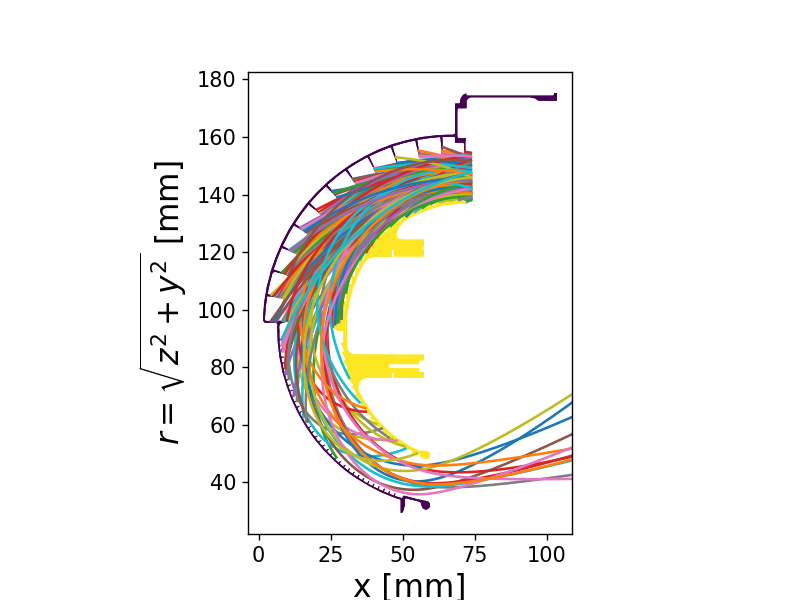

In [5]:
esa.particle_traj(200)

Fly 10000 particles and plot their collision locations

b"status,Loading ion optics bench file.
status,Working:
status,Loading potential array: C:/Users/Jonny Woof/Google Drive/Python_packages_woof/simPyon/examples/sirrated_ESA/esa.pa0
status,Loading SIMION normal PA format file.
status,PA loaded
status,File loaded: C:/Users/Jonny Woof/Google Drive/Python_packages_woof/simPyon/examples/sirrated_ESA/esa.pa0 in 0.02 Sec
status,Loading ION file: ./auto_fly_0.ion
status,Flying particles.
------ Begin Next Fly'm ------
3.114567279815674


<IPython.core.display.Javascript object>


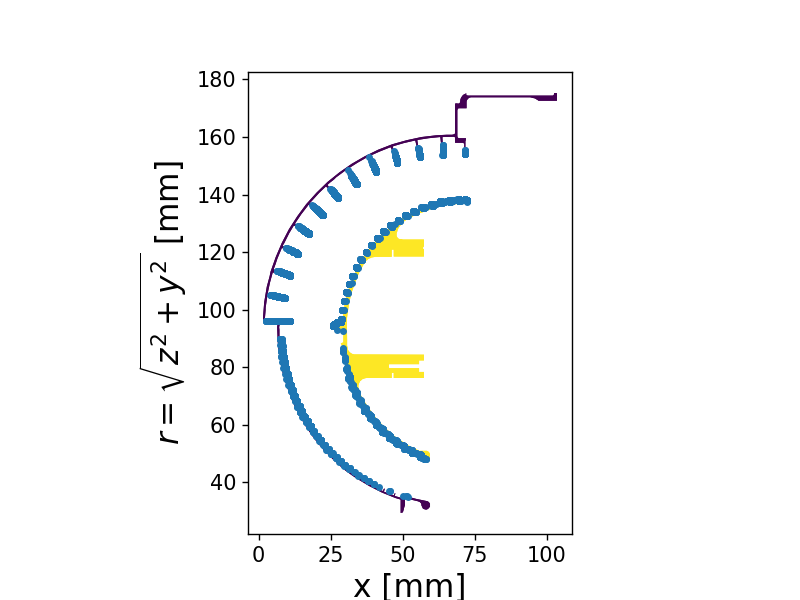

<IPython.core.display.Javascript object>


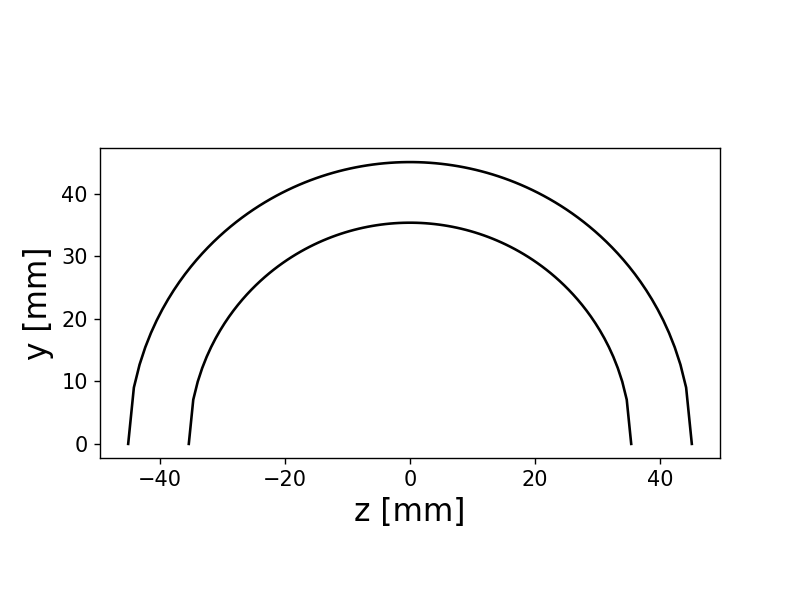

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


(<Figure size 640x480 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x200c0935470>)

In [6]:
esa.fly(10000).show(collision_locs = True)

Redefine the observaation box and look at the distribution functions of the particles that collide within the box

The default observation box is defined in ``simPyon/defaults``, But they are also stored and can be changed in the ``esa.data.obs`` variable.

<IPython.core.display.Javascript object>


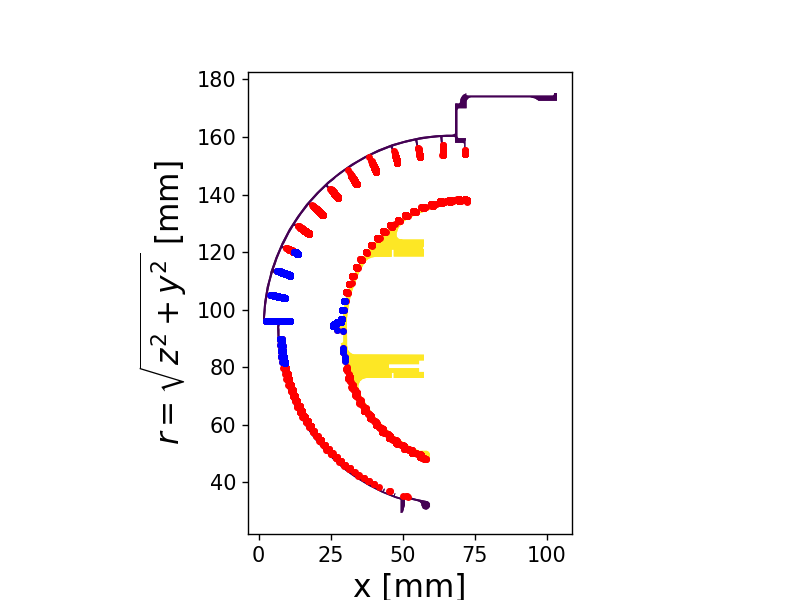

<IPython.core.display.Javascript object>


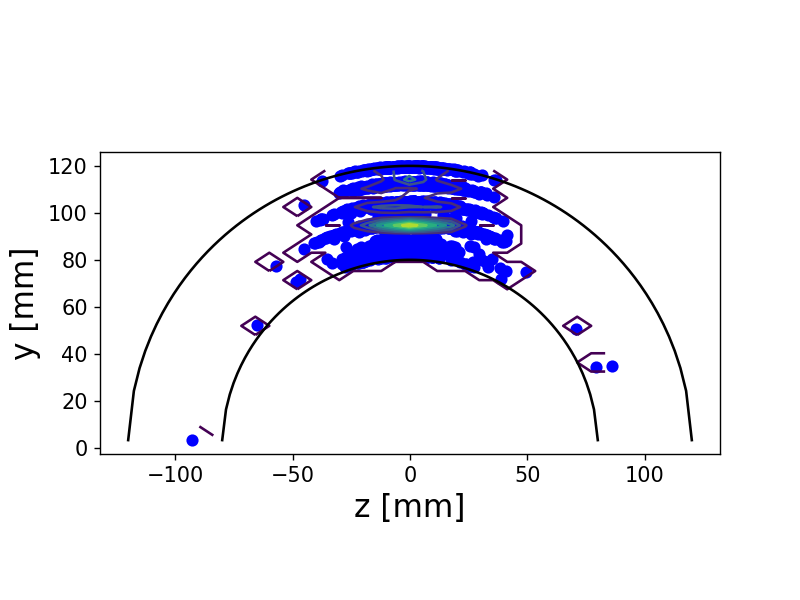

<IPython.core.display.Javascript object>


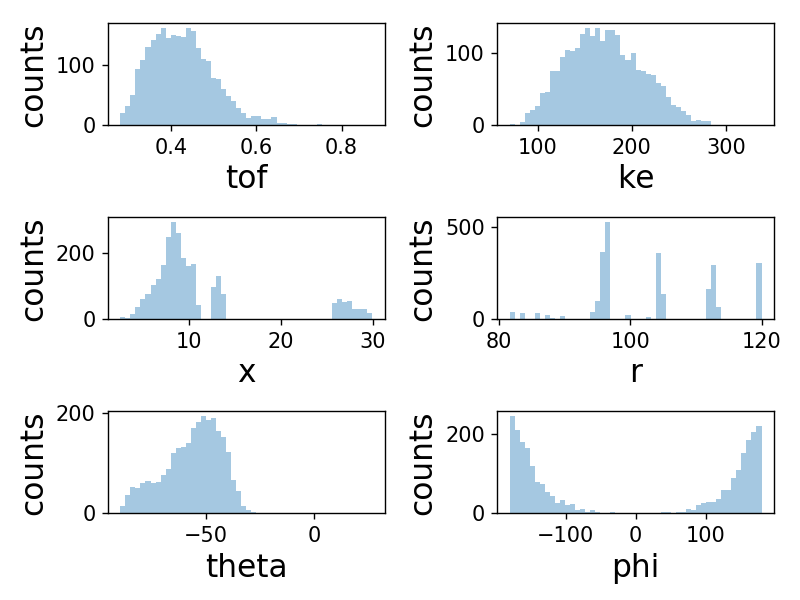

In [13]:
esa.data.obs['X_MAX'] = 30
esa.data.obs['X_MIN'] = 0
esa.data.obs['R_MAX'] = 120
esa.data.obs['R_MIN'] = 80

#plot the collsion locations of the particles that fall within the box
esa.show(collision_locs = True)
# Plot the distributions of the particles that fall within the observation box
esa.data.good().stop().show()

To output the flown data, you can simply grab the data frame

In [15]:
data = esa.data.df
data

{'ion n': array([1.000e+00, 1.000e+00, 2.000e+00, ..., 9.999e+03, 1.000e+04,
        1.000e+04]),
 'tof': array([0.      , 0.569278, 0.      , ..., 0.384247, 0.      , 0.148149]),
 'x': array([73.6544 , 10.4829 , 73.6526 , ...,  5.10592, 73.6257 , 48.     ]),
 'y': array([145.527 ,  75.8783, 145.82  , ..., 103.305 , 150.255 , 151.547 ]),
 'z': array([ 0.     ,  1.81603,  0.     , ..., 18.7888 ,  0.     ,  4.91253]),
 'azm': array([-178.891 ,  -78.5532, -168.696 , ..., -159.719 , -169.245 ,
        -168.825 ]),
 'elv': array([ -5.07595, -88.8476 ,  -6.71226, ..., -47.8274 ,  13.4154 ,
         -6.20088]),
 'vx': array([-182.996   ,    0.621569, -140.18    , ..., -123.093   ,
        -176.432   , -165.195   ]),
 'vy': array([ -16.2576, -155.691 ,  -16.8242, ..., -144.864 ,   42.8347,
         -18.2954]),
 'vz': array([ 3.54343,  3.06968, 28.0197 , ..., 45.4867 , 33.514  , 32.6351 ]),
 'ke': array([174.972, 125.665, 107.367, ..., 197.991, 176.64 , 148.671]),
 'r': array([145.527     ,  75

you can also output the start and stop data separately

In [17]:
start_data = esa.data.start().df
stop_data = esa.data.stop().df